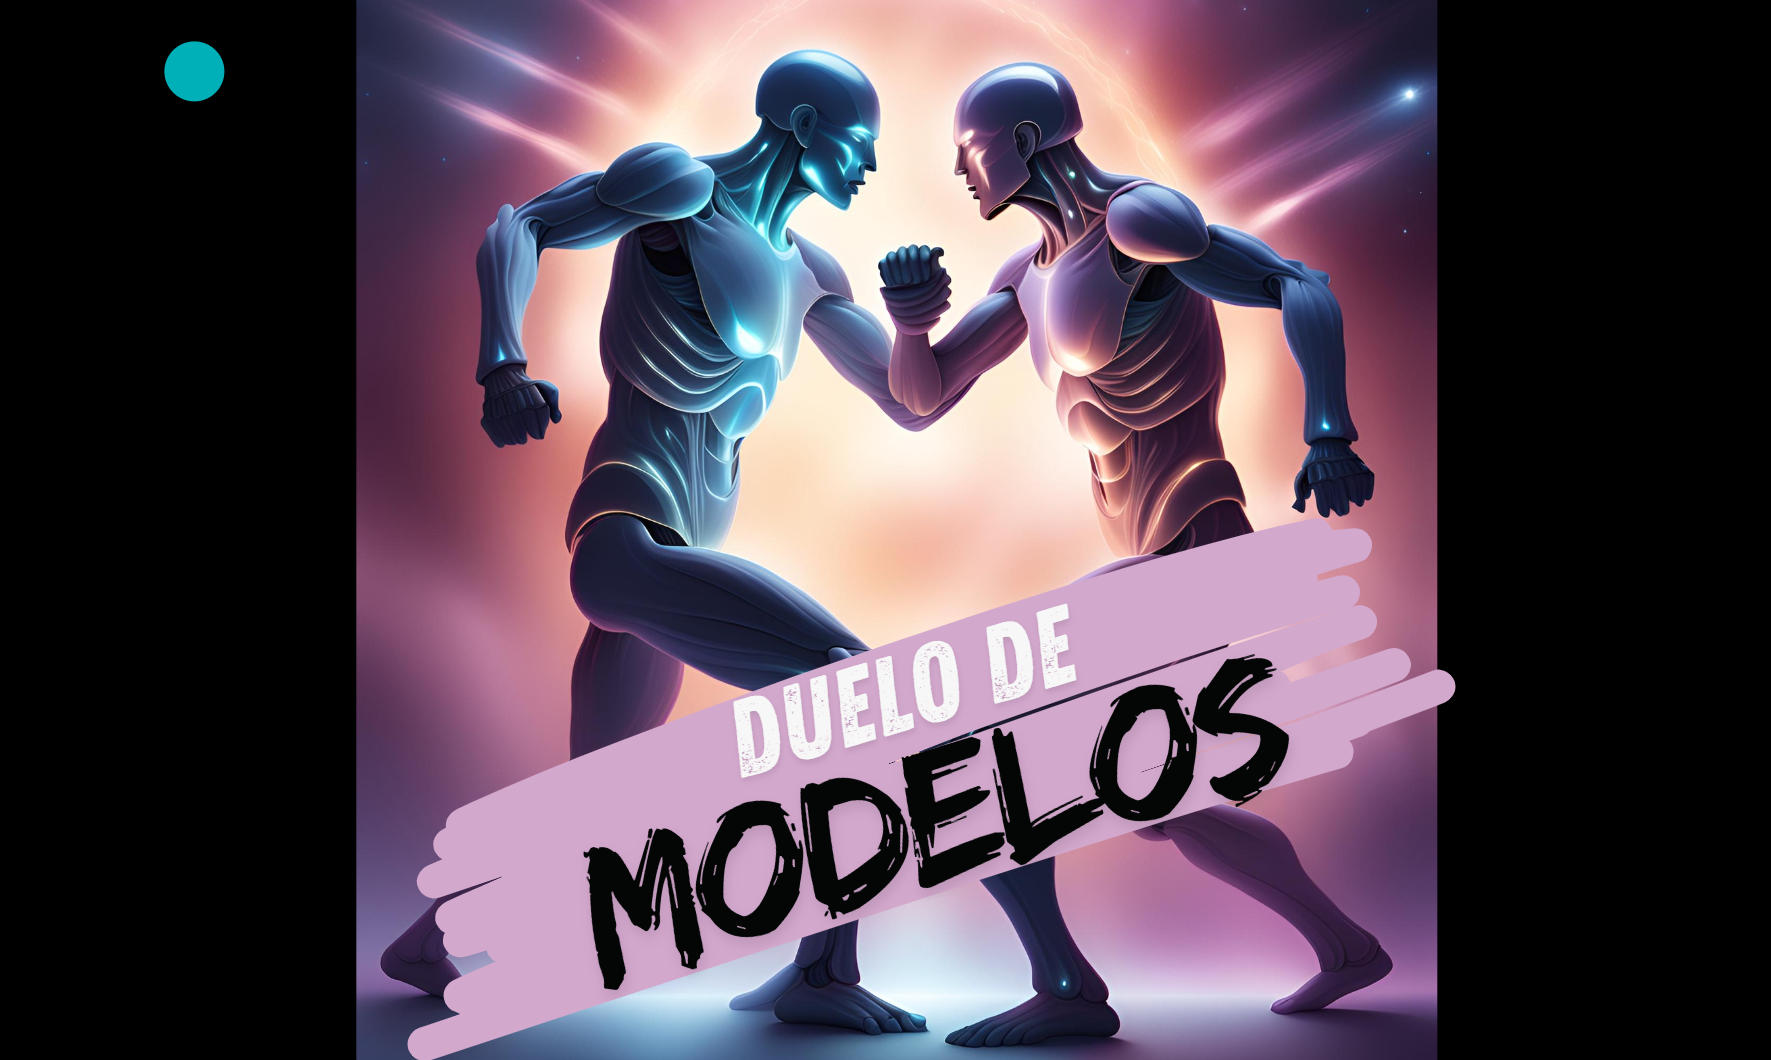

# Dinâmica da aula:

Chegamos à nossa última aula de duelo de modelos, e hoje vamos colocar frente a frente dois dos algoritmos mais poderosos e populares no campo de machine learning: o SVM (Support Vector Machine) e o XGBoost.

O SVM é conhecido por sua capacidade de encontrar a melhor fronteira de decisão entre as classes, mesmo em cenários onde os dados não são linearmente separáveis. É um modelo robusto, especialmente eficaz em casos com margens estreitas entre classes, e tem um forte fundamento matemático que garante alta performance em várias aplicações.

Por outro lado, o XGBoost é um dos algoritmos mais utilizados para problemas de classificação e regressão no mercado. Sua força vem da combinação de árvores de decisão em um processo de boosting, o que lhe confere grande precisão e capacidade de lidar com dados complexos, mesmo em grandes volumes.

Durante esta aula, vamos explorar as particularidades de cada um desses modelos, entender seus pontos fortes e fracos, e realizar uma análise comparativa para determinar qual deles se destaca com a nossa base de dados.

Vale lembrar que ambos os modelos são extremamente robustos e amplamente usados na prática, mas cada um tem seus próprios cenários de aplicação ideais. Ao final, vamos discutir qual modelo se saiu melhor e o porquê, reforçando que, assim como nas aulas anteriores, o desempenho depende muito do contexto e dos dados que estamos utilizando.

# Conhecendo nossos campeões:

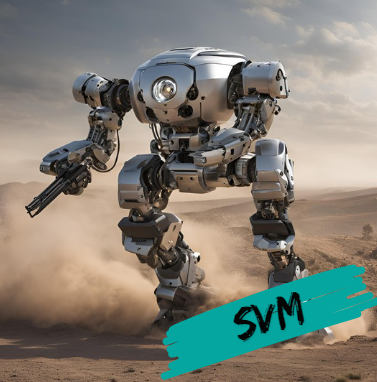

**Apresento a vocês: o modelo SVM (Support Vector Machine)!**

Este modelo de classificação é conhecido por sua habilidade em encontrar a melhor fronteira de decisão entre as classes, mesmo em situações onde os dados não são linearmente separáveis. O SVM funciona mapeando os dados para um espaço de maior dimensão, onde pode encontrar um hiperplano que separa as classes de forma mais clara. Seu poder reside na maximização da margem entre as classes, o que resulta em um modelo robusto e eficaz em diversas aplicações, especialmente quando as margens entre as classes são estreitas.

**Vantagem:** A principal vantagem do SVM é sua capacidade de lidar com problemas complexos de classificação, especialmente em casos onde as classes não são linearmente separáveis. Ele é particularmente eficaz em espaços de alta dimensão e pode ser muito preciso, mesmo com conjuntos de dados relativamente pequenos. Além disso, o SVM é menos propenso ao overfitting quando as margens de separação são claras, o que aumenta sua robustez em muitos cenários.

**Desvantagem:** A desvantagem do SVM é que ele pode ser computacionalmente intensivo, especialmente com grandes volumes de dados. Além disso, a escolha do kernel e dos parâmetros certos pode ser desafiadora, exigindo um ajuste fino para alcançar o melhor desempenho. Se não configurado corretamente, o modelo pode sofrer de overfitting ou underfitting, especialmente em situações onde os dados são altamente ruidosos ou não separáveis.

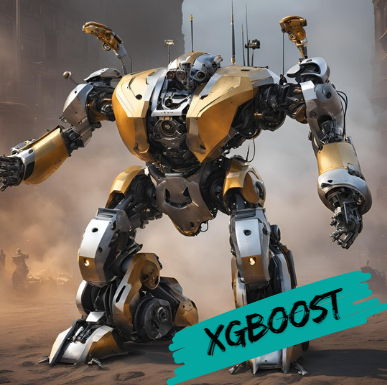

**Apresento a vocês: o modelo XGBoost!**

Este modelo de classificação é uma das ferramentas mais poderosas e populares no mundo do machine learning. O XGBoost se destaca por sua capacidade de construir modelos altamente precisos através de um processo de boosting, onde várias árvores de decisão são combinadas para criar um modelo forte. Ele funciona adicionando sequencialmente novas árvores que corrigem os erros das árvores anteriores, resultando em um modelo final que é altamente eficaz em capturar padrões complexos nos dados.

**Vantagem:** A maior vantagem do XGBoost é sua capacidade de lidar com dados complexos e grandes volumes, oferecendo alta precisão e eficiência. O algoritmo é otimizado para velocidade e desempenho, sendo capaz de processar grandes conjuntos de dados com rapidez. Além disso, ele inclui várias opções de regularização que ajudam a evitar overfitting, tornando-o uma escolha robusta para muitos problemas de classificação e regressão.

**Desvantagem:** A desvantagem do XGBoost é a sua complexidade e a necessidade de um ajuste cuidadoso dos hiperparâmetros para alcançar o melhor desempenho. Devido ao grande número de parâmetros que podem ser ajustados, configurar o modelo corretamente pode ser desafiador e consumir tempo. Além disso, o XGBoost pode ser mais exigente em termos de recursos computacionais, especialmente quando se trabalha com grandes volumes de dados ou modelos muito complexos.

# Arena do duelo (Nossa base de dados):

Para nosso duelo utilizaremos a famosa base de dados do Titanic. Esta base de dados é amplamente utilizada em competições e desafios de machine learning devido à sua simplicidade e ao fato de ser um problema de classificação binária claro: prever se um passageiro sobreviveu ou não ao naufrágio do Titanic, com base em características como idade, gênero, classe do bilhete, entre outras.

Nosso objetivo é que por conta da robustez um dos nossos dois modelos desse duelo alcance uma pontuação na competição do kaggle superior aos outros modelos que treinamos.

In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Bibliotecas para os modelos de machine learning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Bibliotecas para métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Preenchendo valores nulos em Age com a média
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

C:\Users\emers\AppData\Local\Temp\ipykernel_20944\217807486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\emers\AppData\Local\Temp\ipykernel_20944\217807486.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [7]:
# 1. Para a variável 'Sex', podemos usar Label Encoding, pois há apenas duas categorias
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [8]:
# 2. Para a variável 'Embarked', podemos usar One-Hot Encoding, pois há mais de duas categorias
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

In [9]:
# 3. Para a variável 'Cabin', podemos apenas criar uma nova variável indicando se a cabine é conhecida ou não
train_df['Cabin_known'] = train_df['Cabin'].notna().astype(int)
test_df['Cabin_known'] = test_df['Cabin'].notna().astype(int)

# Agora podemos descartar a coluna 'Cabin' original
train_df = train_df.drop(columns=['Cabin'])
test_df_teste = test_df.drop(columns=['Cabin'])

In [10]:
train_df = train_df.drop(columns=['Name','Ticket'])

In [11]:
variaveis = ['Sex', 'Cabin_known','Fare','Pclass']

In [12]:
# Separando as variáveis dependentes (Y) e independentes (X) no conjunto de treino
X = train_df[variaveis]
y = train_df['Survived']

X_test = test_df[variaveis]

# Duelo 1:
Pouco pré processamento

**XGBOOST**

In [13]:
xgboost_duelo1 = xgb.XGBClassifier()

In [14]:
xgboost_duelo1.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
y_pred_xgboost_duelo1 = xgboost_duelo1.predict(X)

In [16]:
relatorio = classification_report(y, y_pred_xgboost_duelo1)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       549
           1       0.89      0.81      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891



**SVM**

In [17]:
svm_duelo1 = SVC(kernel =  'linear', random_state = 1, C = 1.0)
svm_duelo1.fit(X,y)

SVC(kernel='linear', random_state=1)

Um valor de C = 1.0 é um bom ponto de partida, pois representa um equilíbrio entre regularização forte e fraca. Não é nem muito permissivo com erros, nem muito rigoroso.

In [19]:
y_pred_svm_duelo1 = svm_duelo1.predict(X)

In [20]:
relatorio = classification_report(y, y_pred_svm_duelo1)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



# Duelo 2:
Dados Pré Processados

**Padronização:** SVM é bastante sensível à escala das características porque o cálculo do hiperplano de separação depende das distâncias entre os pontos.
XGBoost é menos sensível à escala das características do que o SVM. Embora a padronização possa ajudar a melhorar o desempenho e a convergência do modelo, a influência não é tão crítica quanto no SVM.

**Balanceamento:** O balanceamento dos dados é importante para o SVM, especialmente quando há um desbalanceamento significativo entre as classes.
O balanceamento pode ser benéfico para o XGBoost, especialmente quando há classes desbalanceadas. O XGBoost tem parâmetros específicos para lidar com desbalanceamento, como scale_pos_weight, que pode ser ajustado para melhorar a performance em casos de desbalanceamento.


In [21]:
# Balanceando os dados com SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X, y)

In [23]:
# Padronizando os dados
scaler = StandardScaler()
# Ajustando e transformando os dados de treino balanceados
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [25]:
print("\nDistribuição das classes depois do balanceamento:")
print(Y_train_balanced.value_counts())


Distribuição das classes depois do balanceamento:
Survived
0    549
1    549
Name: count, dtype: int64


**XGBOOST**

In [26]:
xgboost_duelo2 = xgb.XGBClassifier()

In [27]:
xgboost_duelo2.fit(X_train_balanced_scaled, Y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_pred_xgboost_duelo2 = xgboost_duelo2.predict(X_train_balanced_scaled)

In [29]:
relatorio = classification_report(Y_train_balanced, y_pred_xgboost_duelo2)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       549
           1       0.89      0.86      0.88       549

    accuracy                           0.88      1098
   macro avg       0.88      0.88      0.88      1098
weighted avg       0.88      0.88      0.88      1098



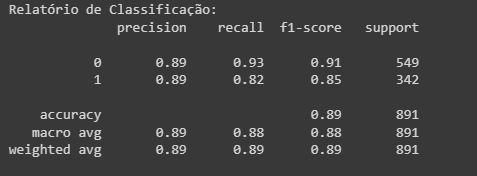

**SVM**

In [30]:
svm_duelo2 = SVC(kernel =  'linear', random_state = 1, C = 1.0)
svm_duelo2.fit(X_train_balanced_scaled, Y_train_balanced)

SVC(kernel='linear', random_state=1)

In [31]:
y_pred_svm_duelo2 = svm_duelo2.predict(X_train_balanced_scaled)

In [32]:
relatorio = classification_report(Y_train_balanced, y_pred_svm_duelo2)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       549
           1       0.75      0.80      0.77       549

    accuracy                           0.77      1098
   macro avg       0.77      0.77      0.77      1098
weighted avg       0.77      0.77      0.77      1098



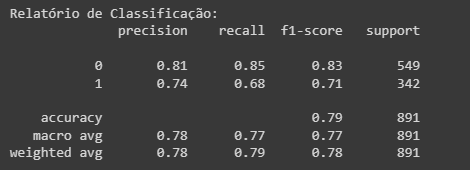

# Duelo 3:
Melhorando nossos hyperparametros.

**Xgboost:**

Aplicando o Grid Search!

In [33]:
param_grid_xgboost = {
    'max_depth': [3, 5, 7],              # Profundidade máxima da árvore
    'n_estimators': [50, 100, 200],      # Número de árvores
    'learning_rate': [0.01, 0.1, 0.2],   # Taxa de aprendizado
    'subsample': [0.8, 1.0],             # Proporção de amostras usadas para treinar cada árvore
    'colsample_bytree': [0.8, 1.0]       # Proporção de características para cada árvore
}

O learning_rate (taxa de aprendizado) é um hiperparâmetro do XGBoost que controla o impacto de cada árvore individual no modelo final. Ele ajusta a contribuição de cada árvore para o conjunto geral de árvores, essencialmente "freando" ou "acelerando" o aprendizado do modelo.

**Valores Baixos (ex: 0.01):** Fazem com que o modelo aprenda de maneira mais lenta e cuidadosa. Isso ajuda a reduzir o risco de overfitting

**Valores Altos (ex: 0.2):** Permitem que o modelo aprenda mais rapidamente, mas correm o risco de ajustar-se demais aos dados de treino muito rapidamente.

O colsample_bytree é um hiperparâmetro no XGBoost que especifica a proporção de features (características) a serem amostradas aleatoriamente para cada árvore durante o treinamento. Esse hiperparâmetro controla a diversidade das árvores no conjunto, ajudando a reduzir a correlação entre as árvores e, consequentemente, o risco de overfitting.

0,8 Indica que apenas 80% das características são selecionadas aleatoriamente para treinar cada árvore.

In [34]:
xgboost_duelo3 = xgb.XGBClassifier()

In [35]:
grid_search_xgboost = GridSearchCV(
    estimator=xgboost_duelo3,   # Modelo a ser usado
    param_grid=param_grid_xgboost,      # Conjunto de parâmetros
    scoring='accuracy',         # Métrica de avaliação
    cv=5,                       # Número de folds para cross-validation
    n_jobs=-1                   # Usa todos os processadores disponíveis

)

In [36]:
grid_search_xgboost.fit(X_train_balanced_scaled, Y_train_balanced)

# Melhor modelo e parâmetros
print("Melhores Parâmetros:", grid_search_xgboost.best_params_)
print("Melhor Acurácia:", grid_search_xgboost.best_score_)

Melhores Parâmetros: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Melhor Acurácia: 0.8206434205064342


In [37]:
best_model_xgboost = grid_search_xgboost.best_estimator_
y_pred_duelo3_xgboost = best_model_xgboost.predict(X_train_balanced_scaled)

In [38]:
relatorio = classification_report(Y_train_balanced, y_pred_duelo3_xgboost)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       549
           1       0.89      0.86      0.88       549

    accuracy                           0.88      1098
   macro avg       0.88      0.88      0.88      1098
weighted avg       0.88      0.88      0.88      1098



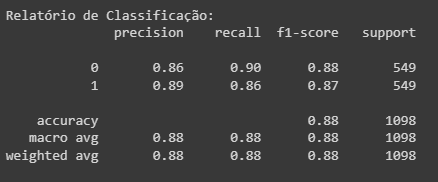

**SVM:**

In [39]:
svm_duelo3 = SVC(kernel='linear', random_state=1)

In [40]:
param_grid_SVM = {
    'C': [0.1, 1, 10, 100],  # Diferentes valores de penalidade
    'kernel': ['linear', 'rbf'],  # Testando kernel linear e RBF
}

In [41]:
grid_search_svm = GridSearchCV(estimator=svm_duelo3,
                           param_grid=param_grid_SVM,
                           scoring='accuracy',  # Métrica de avaliação
                           cv=5,  # Número de folds para cross-validation
                           verbose=2,  # Para acompanhar o progresso
                           n_jobs=-1)  # Para usar todos os processadores disponíveis

In [42]:
grid_search_svm.fit(X_train_balanced_scaled, Y_train_balanced)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [43]:
best_params = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

In [44]:
y_pred_svm_duelo3 = best_svm_model.predict(X_train_balanced_scaled)

In [45]:
print("Melhores hiperparâmetros encontrados:", best_params)

Melhores hiperparâmetros encontrados: {'C': 100, 'kernel': 'rbf'}


In [46]:
relatorio = classification_report(Y_train_balanced, y_pred_svm_duelo3)
print("Relatório de Classificação com o Melhor Modelo:")
print(relatorio)

Relatório de Classificação com o Melhor Modelo:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       549
           1       0.80      0.79      0.80       549

    accuracy                           0.80      1098
   macro avg       0.80      0.80      0.80      1098
weighted avg       0.80      0.80      0.80      1098



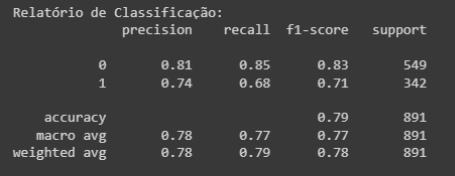

**SALVANDO MELHORES RESULTADOS:**

## xgboost - modelo duelo 2

In [47]:
Y_xgboost = xgboost_duelo2.predict(X_test_scaled)

In [48]:
Y_xgboost

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [49]:
sub_xgboost = pd.Series(Y_xgboost, index=test_df['PassengerId'], name = 'Survived')

In [50]:
sub_xgboost

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int32

In [51]:
sub_xgboost.to_csv("xgboost.csv" , header=True)

## SVVM - Modelo duelo 3

In [52]:
Y_svm = best_svm_model.predict(X_test_scaled)

In [53]:
Y_svm

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [54]:
sub_svm = pd.Series(Y_svm, index=test_df['PassengerId'], name = 'Survived')

In [55]:
sub_svm

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [56]:
sub_svm.to_csv("svm.csv" , header=True)

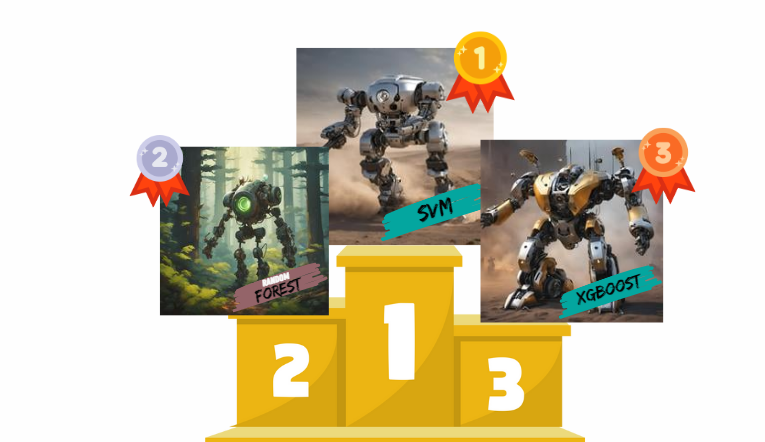

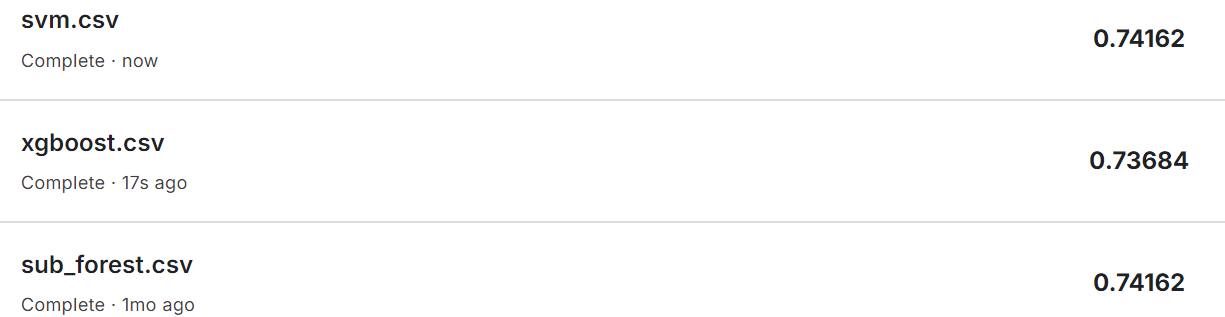

O SVM demonstrou a melhor performance nesse cenário. Isso indica que o modelo conseguiu capturar bem as separações entre as classes, especialmente porque o kernel linear é bastante eficiente quando há uma separação clara no espaço das características.

O sucesso do SVM também pode ser atribuído ao pré-processamento dos dados, como a padronização, que é essencial para o bom funcionamento desse algoritmo.